<a href="https://colab.research.google.com/github/mukanzi/Google-colab-Notebooks/blob/main/Alumni_Survey_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

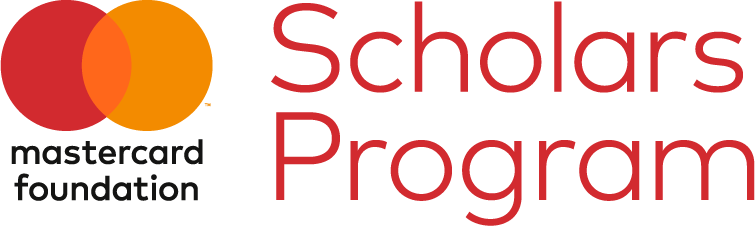
# Alumni Survey 2023 Data Cleaning.

The following notebook presents a comprehensive record of the data cleaning and preprocessing activities that have been systematically applied to the 2023 Alumni Survey dataset. It encompasses a detailed account of each step undertaken to ensure the data's integrity and quality, which includes the rectification of inconsistencies, the treatment of missing values, and the standardization of variable formats.

These preparatory measures are crucial in optimizing the dataset for accurate and efficient analysis, thereby laying a solid foundation for the robust analytical models that will follow. Moreover, the procedural documentation within this notebook has been meticulously crafted to facilitate reproducibility, allowing for the data cleaning process to be reliably duplicated or audited in the future. This level of documentation serves as both a methodological guide and a transparent audit trail for the data preparation phase of the survey analysis project.

## Setting up the tools

In [98]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Getting the data

In [99]:
df = pd.read_csv("/content/2023 Alumni Survey.csv")
df.head()

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,Last Name,Custom Data 1,rq_flag,...,Please provide the name of your Scholars Program Partner institution at the Secondary level (EG. Equity Group Foundation - Wings to Fly (TVET). Note: Please select N/A if it does not apply to you,Please provide the name of your Scholars Program Partner institution at the Undergraduate level . (EG. Université Gaston Berger) Note: Please select N/A if it does not apply to you,Please provide the name of your Scholars Program Partner institution at the graduate level . (EG. KNUST) Note: Please select N/A if it does not apply to you,In which year did you complete your program?(Most recent year of completion if you have enrolled at more than one Scholars Program partner).,What is the best email address to reach you at ?,Phone,Unnamed: 88,How did you first hear about the survey?,Unnamed: 90,Please confirm your email address to enter the draw.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Response,Response,Response,Response,Email address,Phone number,NaN,Response,"Another alumni via email, WhatsApp, or another...",Email address
1,1.144925e+11,428582206.0,12/19/2023 03:22:36 AM,02/12/2024 08:16:32 AM,165.0.154.211,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.144973e+11,428582206.0,12/28/2023 01:40:52 PM,01/01/2024 05:59:12 AM,102.223.155.76,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,jambawaiesatu@gmail.com,+232 78 684097,NaN,Baobab platform (newsletter/social media platf...,NaN,jambawaiesatu@gmail.com
3,1.144985e+11,428582206.0,12/31/2023 05:59:09 PM,12/31/2023 06:06:01 PM,102.176.101.25,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,2022,nasirdampson1@gmail.com,+233 24 172 5046,NaN,"Another alumni via email, WhatsApp, or another...","Esther Acquah Benson, University of Cape Coast",nasirdampson1@gmail.com
4,1.144985e+11,428582206.0,12/31/2023 05:29:02 PM,12/31/2023 05:33:50 PM,105.119.1.208,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,2019,agbonyinayomide80@gmail.com,+234 903 519 4844,NaN,Mastercard Foundation,NaN,agbonyinayomide80@gmail.com


In [100]:
df.shape

(4000, 92)

##Column clean up

In [101]:
#Listing all the columns
df.columns

Index(['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address',
       'Email Address', 'First Name', 'Last Name', 'Custom Data 1', 'rq_flag',
       'language',
       'Do you agree to your Survey responses being collected, stored, processed and used by the Mastercard Foundation as stated above (including the use of your Survey responses in aggregated and anonymized form for external reports and documents) and at all times in accordance with the Mastercard Foundation Privacy Policy.',
       'Do you wish to participate in the random draw for a prize and acknowledge that you have read, understood and agree to the Official Rules? If you do not agree to the Official Rules, you will not be eligible to be entered into the random draw.',
       'The Mastercard Foundation has several Alumni engagement and future funding opportunities that may be relevant to you. To keep you up to date about these opportunities, we’d like to update your contact information in our system. We wo

In [102]:
#renaming columns that have extremely long column names.
df.rename(columns={"Do you agree to your Survey responses being collected, stored, processed and used by the Mastercard Foundation as stated above (including the use of your Survey responses in aggregated and anonymized form for external reports and documents) and at all times in accordance with the Mastercard Foundation Privacy Policy.":"Consent",'Do you wish to participate in the random draw for a prize and acknowledge that you have read, understood and agree to the Official Rules? If you do not agree to the Official Rules, you will not be eligible to be entered into the random draw.':"Draw Participation"}, inplace=True)
df.rename(columns={"The Mastercard Foundation has several Alumni engagement and future funding opportunities that may be relevant to you. To keep you up to date about these opportunities, we’d like to update your contact information in our system. We would also like to share your contact information with the team at Arizona State University responsible for the Baobab Platform, which is the hub of the Scholar and Alumni community and will process Mastercard Foundation Alumni data related to the Baobab Platform and alumni networksDo you agree to receive electronic communications from Mastercard Foundation and Arizona State University, including emails about alumni engagement and future funding opportunities, follow-up surveys, interview requests evaluation and research efforts? If you agree, your contact information will be shared with Arizona State University for this purpose. You can withdraw your consent at any time by contacting Mastercard Foundation’s Privacy Officer at privacy@mastercardfdn.org":"Alumni Engagement"}, inplace=True)
df.rename(columns={'I hereby confirm that I am at least 18 years of age and that I am eligible to give my consent to participate in this Survey.':'Age Confirmation'}, inplace=True)

### Deleting data for non-storage and analysis.

As part of our data governance protocols, we will be purging the records of respondents who did not provide consent for their data to be retained, distributed, or employed in analytical processes.

Additionally, any respondents who were under the age of 18 will have any responses deleted too.

In [103]:
df.drop(1, inplace=True)
df=df[df['Consent']=='Yes']
df.shape

(3982, 92)

In [104]:
df =df[df['Age Confirmation']=='Yes']
df.shape

(3965, 92)

In [105]:
df.head()

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,Last Name,Custom Data 1,rq_flag,...,Please provide the name of your Scholars Program Partner institution at the Secondary level (EG. Equity Group Foundation - Wings to Fly (TVET). Note: Please select N/A if it does not apply to you,Please provide the name of your Scholars Program Partner institution at the Undergraduate level . (EG. Université Gaston Berger) Note: Please select N/A if it does not apply to you,Please provide the name of your Scholars Program Partner institution at the graduate level . (EG. KNUST) Note: Please select N/A if it does not apply to you,In which year did you complete your program?(Most recent year of completion if you have enrolled at more than one Scholars Program partner).,What is the best email address to reach you at ?,Phone,Unnamed: 88,How did you first hear about the survey?,Unnamed: 90,Please confirm your email address to enter the draw.
2,1.144973e+11,428582206.0,12/28/2023 01:40:52 PM,01/01/2024 05:59:12 AM,102.223.155.76,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,jambawaiesatu@gmail.com,+232 78 684097,NaN,Baobab platform (newsletter/social media platf...,NaN,jambawaiesatu@gmail.com
3,1.144985e+11,428582206.0,12/31/2023 05:59:09 PM,12/31/2023 06:06:01 PM,102.176.101.25,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,2022,nasirdampson1@gmail.com,+233 24 172 5046,NaN,"Another alumni via email, WhatsApp, or another...","Esther Acquah Benson, University of Cape Coast",nasirdampson1@gmail.com
4,1.144985e+11,428582206.0,12/31/2023 05:29:02 PM,12/31/2023 05:33:50 PM,105.119.1.208,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,2019,agbonyinayomide80@gmail.com,+234 903 519 4844,NaN,Mastercard Foundation,NaN,agbonyinayomide80@gmail.com
5,1.144984e+11,428582206.0,12/31/2023 12:51:05 PM,12/31/2023 02:50:13 PM,196.25.129.182,NaN,NaN,NaN,NaN,0.0,...,NaN,University of Pretoria,University of Pretoria,2024,daggiydansa@gmail.com,+27 67 698 08,NaN,Mastercard Foundation,NaN,daggiydansa@gmail.com
6,1.144984e+11,428582206.0,12/31/2023 11:49:49 AM,12/31/2023 12:08:56 PM,41.186.164.173,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,mushimiyepelagie@gmail.com,+250 790 766 212,NaN,NaN,NaN,mushimiyepelagie@gmail.com


#### Column mapping

Remapping: 'How would you describe your well-being over the last week on a scale of 1-5? Note: We want to know how you are doing with regards to your well-being in general' to "Weekly_wellbeing_score" and the subsequent answers to Hindering:factor and Supporting:factor.

In [106]:
df.rename(columns={'How would you describe your well-being over the last week on a scale of 1-5? Note: We want to know how you are doing with regards to your well-being in general ':"Weekly_Wellbeing_Score"}, inplace=True)
df.rename(columns={'What is hindering your current level of well-being? (select all that apply)':"Hindering: Work status"}, inplace=True)
df.rename(columns={'Unnamed: 17':"Hindering: Family situation", 'Unnamed: 18':"Hindering: Home-country situation", 'Unnamed: 19':"Hindering: Personal relationships", 'Unnamed: 20':"Hindering: Recent transition post graduation",
       'Unnamed: 21':"Hindering: School experience", 'Unnamed: 22':"Hindering: Other"}, inplace=True)

df.head()

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,Last Name,Custom Data 1,rq_flag,...,Please provide the name of your Scholars Program Partner institution at the Secondary level (EG. Equity Group Foundation - Wings to Fly (TVET). Note: Please select N/A if it does not apply to you,Please provide the name of your Scholars Program Partner institution at the Undergraduate level . (EG. Université Gaston Berger) Note: Please select N/A if it does not apply to you,Please provide the name of your Scholars Program Partner institution at the graduate level . (EG. KNUST) Note: Please select N/A if it does not apply to you,In which year did you complete your program?(Most recent year of completion if you have enrolled at more than one Scholars Program partner).,What is the best email address to reach you at ?,Phone,Unnamed: 88,How did you first hear about the survey?,Unnamed: 90,Please confirm your email address to enter the draw.
2,1.144973e+11,428582206.0,12/28/2023 01:40:52 PM,01/01/2024 05:59:12 AM,102.223.155.76,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,jambawaiesatu@gmail.com,+232 78 684097,NaN,Baobab platform (newsletter/social media platf...,NaN,jambawaiesatu@gmail.com
3,1.144985e+11,428582206.0,12/31/2023 05:59:09 PM,12/31/2023 06:06:01 PM,102.176.101.25,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,2022,nasirdampson1@gmail.com,+233 24 172 5046,NaN,"Another alumni via email, WhatsApp, or another...","Esther Acquah Benson, University of Cape Coast",nasirdampson1@gmail.com
4,1.144985e+11,428582206.0,12/31/2023 05:29:02 PM,12/31/2023 05:33:50 PM,105.119.1.208,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,2019,agbonyinayomide80@gmail.com,+234 903 519 4844,NaN,Mastercard Foundation,NaN,agbonyinayomide80@gmail.com
5,1.144984e+11,428582206.0,12/31/2023 12:51:05 PM,12/31/2023 02:50:13 PM,196.25.129.182,NaN,NaN,NaN,NaN,0.0,...,NaN,University of Pretoria,University of Pretoria,2024,daggiydansa@gmail.com,+27 67 698 08,NaN,Mastercard Foundation,NaN,daggiydansa@gmail.com
6,1.144984e+11,428582206.0,12/31/2023 11:49:49 AM,12/31/2023 12:08:56 PM,41.186.164.173,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,mushimiyepelagie@gmail.com,+250 790 766 212,NaN,NaN,NaN,mushimiyepelagie@gmail.com


In [107]:
#Mapping the supporting columns.
df.rename(columns={'What is supporting your current level of well-being? (select all that apply)':'supporting:Work status'}, inplace=True)
df.rename(columns={'Unnamed: 24':'supporting: Family situation', 'Unnamed: 25':'supporting: Home-country situation', 'Unnamed: 26':'supporting:Personal relationships', 'Unnamed: 27':'supporting:Recent transition post graduation',
       'Unnamed: 28':'supporting:School experience', 'Unnamed: 29':'supporting: Other'}, inplace=True)



In [108]:
#Mapping the current work status column
df.rename(columns={'Which of the following best describes your current work situation? (Select all that apply)':'Current_Work_Status:Paid Full-time Employment'}, inplace=True)
df.rename(columns={'Unnamed: 31':'Current_Work_Status:Paid Part-time Employment', 'Unnamed: 32':'Current_Work_Status:Entrepreneurship', 'Unnamed: 33':'Current_Work_Status:Freelancing', 'Unnamed: 34': 'Current_Work_Status:Job Searching',
       'Unnamed: 35':'Current_Work_Status:Not interested in working', 'Unnamed: 36':'Current_Work_Status:Other (please specify)'}, inplace=True)

In [109]:
#Mapping the job industry
df.rename(columns={'In which industry are or were you employed, or operate your business? (Select a maximum of three options).':'Industry_Secotr:Agriculture'}, inplace=True)

df.rename(columns={'Unnamed: 38':"Industry_Sector:Arts, Entertainment and Recreation", 'Unnamed: 39':"Industry_Sector:Construction/Utilities/Contracting", 'Unnamed: 40':"Industry_Sector:Education", 'Unnamed: 41':"Industry_sector:Energy",
       'Unnamed: 42':"Industry_Sector:Finance and Insurance", 'Unnamed: 43':"Industry_Sector:Food Services", 'Unnamed: 44':"Industry_Sector:Healthcare", 'Unnamed: 45': "Industry_Sector:Hospitality",
       'Unnamed: 46':"industry_Sector:Legal", 'Unnamed: 47':"industry_Sector:manufacturing", 'Unnamed: 48':"industry_Sector:Mining", 'Unnamed: 49':"industry_Sector:News Media",
       'Unnamed: 50':"industry_Sector:Non-profit Organization", 'Unnamed: 51':"industry_Sector:Pharmaceutical", 'Unnamed: 52':"industry_Sector:Real Estate and Rental and Leasing", 'Unnamed: 53':"industry_Sector:Technology and Information",
       'Unnamed: 54':"industry_Sector:Transport", 'Unnamed: 55':"industry_Sector:other"}, inplace=True)

In [110]:
#Mapping the first year of obtaining paid opportunity
df.rename( columns= {'When did you obtain your first paid work opportunity? ' :"First_Employment_Year"}, inplace=True)

In [111]:
#Mapping Further education
df.rename(columns={'Which of the following describes your current studies situation?':'Current_Study_Status'}, inplace=True)
df.rename(columns={'What further education are you pursuing?':'"Further_Education_Field"'}, inplace=True)

In [112]:
#mapping future activities and plans
df.rename(columns={'When you think about the next steps in your career/professional journey, what do you plan or hope to do? (Select all that apply).':"Future:Higher Position"}, inplace=True)
df.rename(columns={'Unnamed: 60':'Future: Change industry', 'Unnamed: 61': 'Future: Further studies ', 'Unnamed: 62':'Future: Own Venture', 'Unnamed: 63':'Future: Scale ',
       'Unnamed: 64':'Future: Break ', 'Unnamed: 65':'Future:Deepen Current', 'Unnamed: 66':'Future:Other'}, inplace=True)

In [113]:
#Mapping Future support
df.rename(columns={ 'Is there a way we can continue supporting you in the next steps of your journey? (Select all that apply).':'Support_Needs:BDS'}, inplace=True)
df.rename(columns={'Unnamed: 68':'Support_Needs:Capital' , 'Unnamed: 69':'Support_Needs: Job', 'Unnamed: 70':'Support_Needs: Mentorship', 'Unnamed: 71':'Support_Needs:Networking',
       'Unnamed: 72':'Support_Needs: Growth', 'Unnamed: 73':'Support_Needs:Other'}, inplace=True)

In [114]:
#Mapping the names and gender
df.rename(columns={'Name':'First_Name', 'Unnamed: 75':'Middle Name', 'Unnamed: 76':'last name'}, inplace=True)
df.rename(columns={'What is your gender?':'Gender'},inplace=True)
df.rename(columns={'What is your country of residence ?':'Country_of_residence'},inplace=True)

In [115]:
#Mapping instituiton(s) attended
df.rename(columns={'Please provide the name of your Scholars Program Partner institution at the Secondary level (EG. Equity Group Foundation - Wings to Fly (TVET). Note: Please select N/A if it does not apply to you':'Secondary'}, inplace=True)
df.rename(columns={'Please provide the name of your Scholars Program Partner institution at the Undergraduate level . (EG. Université Gaston Berger) Note: Please select N/A if it does not apply to you':'undergraduate'}, inplace=True)
df.rename(columns={'Please provide the name of your Scholars Program Partner institution at the graduate level . (EG. KNUST) Note: Please select N/A if it does not apply to you':'Graduate'}, inplace=True)


In [116]:
#Mapping demographic infomation
df.rename(columns={'In which year did you complete your program?(Most recent year of completion if you have enrolled at more than one Scholars Program partner).':'Graduation year'}, inplace=True)
df.rename(columns={'What is the best email address to reach you at ?':'Contact Email'}, inplace=True)
df.rename(columns={'How did you first hear about the survey?':'Communication Channel'}, inplace=True)
df.rename(columns={'Please confirm your email address to enter the draw.': 'Draw Email'}, inplace=True)

df.columns

Index(['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address',
       'Email Address', 'First Name', 'Last Name', 'Custom Data 1', 'rq_flag',
       'language', 'Consent', 'Draw Participation', 'Alumni Engagement',
       'Age Confirmation', 'Weekly_Wellbeing_Score', 'Hindering: Work status',
       'Hindering: Family situation', 'Hindering: Home-country situation',
       'Hindering: Personal relationships',
       'Hindering: Recent transition post graduation',
       'Hindering: School experience', 'Hindering: Other',
       'supporting:Work status', 'supporting: Family situation',
       'supporting: Home-country situation',
       'supporting:Personal relationships',
       'supporting:Recent transition post graduation',
       'supporting:School experience', 'supporting: Other',
       'Current_Work_Status:Paid Full-time Employment',
       'Current_Work_Status:Paid Part-time Employment',
       'Current_Work_Status:Entrepreneurship',
       'Current_Work_Status:

##Feature selection
Eliminating superfluous columns that do not add value or relevance to the analysis, thereby streamlining the database for more efficient data processing and evaluation.


In [117]:
columns_to_drop = ['Collector ID','IP Address','Email Address','Custom Data 1', 'First Name', 'Last Name', 'Custom Data 1', 'Unnamed: 77', 'Unnamed: 78','Unnamed: 81','Unnamed: 88','Unnamed: 90','Draw Email','Custom Data 1', 'rq_flag',
       'language', 'Consent', 'Draw Participation', 'Alumni Engagement',
       'Age Confirmation']
df.drop(columns_to_drop, axis=1, inplace= True)

df.shape

(3965, 74)

### Deleting rows with missing data.

From an analysis, it was clear that any respondents that did not answer the weekly well being score question did not proceed to further any of the other questions in the survey. As such, these records will be dropped as they add no value to the analysis and would in no way skew the results or impact the results.

In [118]:
df.dropna(subset=['Weekly_Wellbeing_Score'], inplace=True)


df.shape

(3822, 74)

## Data Cleaning

In [119]:
# Specifying the columns to concatenate
columns_to_concatenate = [
    'Hindering: Work status',
    'Hindering: Family situation',
    'Hindering: Home-country situation',
    'Hindering: Personal relationships',
    'Hindering: Recent transition post graduation',
    'Hindering: School experience'
]

# Concatenating the specified columns into one, using a comma as the delimiter
df['Hindering_Factors_Combined'] = df[columns_to_concatenate].apply(
    lambda x: ','.join(x.dropna()), axis=1)

In [120]:
# Specifying the columns to concatenate
columns_to_concatenate = [
    'supporting:Work status', 'supporting: Family situation',
       'supporting: Home-country situation',
       'supporting:Personal relationships',
       'supporting:Recent transition post graduation',
       'supporting:School experience']

# Concatenating the specified columns into one, using a comma as the delimiter
df['Supporting_Factors_Combined'] = df[columns_to_concatenate].apply(
    lambda x: ', '.join(x.dropna()), axis=1)

In [121]:
# Specifying the columns to concatenate
columns_to_concatenate = [
    'Industry_Secotr:Agriculture',
       'Industry_Sector:Arts, Entertainment and Recreation',
       'Industry_Sector:Construction/Utilities/Contracting',
       'Industry_Sector:Education', 'Industry_sector:Energy',
       'Industry_Sector:Finance and Insurance',
       'Industry_Sector:Food Services', 'Industry_Sector:Healthcare',
       'Industry_Sector:Hospitality', 'industry_Sector:Legal',
       'industry_Sector:manufacturing', 'industry_Sector:Mining',
       'industry_Sector:News Media', 'industry_Sector:Non-profit Organization',
       'industry_Sector:Pharmaceutical',
       'industry_Sector:Real Estate and Rental and Leasing',
       'industry_Sector:Technology and Information',
       'industry_Sector:Transport'
]

# Concatenating the specified columns into one, using a comma as the delimiter
df['Industry'] = df[columns_to_concatenate].apply(
    lambda x: ', '.join(x.dropna()), axis=1)

In [122]:
# Specifying the columns to concatenate
columns_to_concatenate = [
'Future:Higher Position',
       'Future: Change industry', 'Future: Further studies ',
       'Future: Own Venture', 'Future: Scale ', 'Future: Break ',
       'Future:Deepen Current'
]

# Concatenating the specified columns into one, using a comma as the delimiter
df['Future Plans'] = df[columns_to_concatenate].apply(
    lambda x: ', '.join(x.dropna()), axis=1)

In [123]:
# Specifying the columns to concatenate
columns_to_concatenate = [
'Current_Work_Status:Paid Full-time Employment',
       'Current_Work_Status:Paid Part-time Employment',
       'Current_Work_Status:Entrepreneurship',
       'Current_Work_Status:Freelancing', 'Current_Work_Status:Job Searching',
       'Current_Work_Status:Not interested in working'
]

# Concatenating the specified columns into one, using a comma as the delimiter
df['Current work status'] = df[columns_to_concatenate].apply(
    lambda x: ', '.join(x.dropna()), axis=1)

In [124]:
# Specifying the columns to concatenate
columns_to_concatenate = [
'Support_Needs:BDS',
       'Support_Needs:Capital', 'Support_Needs: Job',
       'Support_Needs: Mentorship', 'Support_Needs:Networking',
       'Support_Needs: Growth'
]

# Concatenating the specified columns into one, using a comma as the delimiter
df['Support_Needs'] = df[columns_to_concatenate].apply(
    lambda x: ', '.join(x.dropna()), axis=1)

# Displaying the first few rows of the new combined column to verify the operation
df[['Support_Needs','Industry','Supporting_Factors_Combined', 'Hindering_Factors_Combined', 'Future Plans','Current work status']].tail()

,Support_Needs,Industry,Supporting_Factors_Combined,Hindering_Factors_Combined,Future Plans,Current work status
3994,"Access to Business Development Services, Acces...",Agriculture,Personal relationships,"Family situation,Home-country situation","Go back to school or get further training, Sca...","Entrepreneurship, Job Searching"
3995,"Access to Capital, Job Opportunities, Mentorsh...",Healthcare,"Work status, Recent transition post graduation...",Family situation,Pursue a higher position in my current field/j...,"Paid Part-time Employment, Job Searching"
3997,"Access to Business Development Services, Acces...",,School experience,Family situation,Start my own business,
3998,"Access to Business Development Services, Acces...",,Work status,,Pursue a higher position in my current field/j...,Entrepreneurship
3999,Job Opportunities,"Agriculture, Arts, Entertainment and Recreation",Home-country situation,"Family situation,Home-country situation",Pursue a higher position in my current field/job,Paid Full-time Employment


### Duplicated data

There were a couple of duplicated responses, indicated by the presence of duplicated email entries. Through consultations and dialogue a consesus was achieved where we agreed to keep the initial response as more likely the latter response was biased  as they had already seen the Alumhni survey as they had already been privy to the question.

In [125]:
df.drop_duplicates(subset= 'Contact Email',inplace=True, keep='first')

In [126]:
#Final dataframe
final_df = df.copy()

In [127]:
df.shape

(3472, 80)

## Datasets creation

Creating datasets that will help with the visualizaiton of the individual factors and the influence they have so as to visualize responses that were shared as part of a global question where respondents had to choose more than one.

### Demographics Dataset

In [128]:
demographics = df[['Respondent ID', 'First_Name','Middle Name', 'last name','Gender','Graduation year','Country_of_residence','Communication Channel']]
demographics.head()


,Respondent ID,First_Name,Middle Name,last name,Gender,Graduation year,Country_of_residence,Communication Channel
2,1.144973e+11,Esatu,Jambawai,Miatta,Female,NaN,Sierra Leone,Baobab platform (newsletter/social media platf...
3,1.144985e+11,Nasir,Dampson,NaN,Male,2022,Ghana,"Another alumni via email, WhatsApp, or another..."
4,1.144985e+11,Ayomide,Agbonyin,Adeshola,Female,2019,Nigeria,Mastercard Foundation
5,1.144984e+11,Dagmawit,Dansa,Tilahun,Female,2024,South Africa,Mastercard Foundation
6,1.144984e+11,Pelagie,Mushimiyimana,NaN,Female,NaN,Rwanda,NaN


In [129]:
Well_being = df[['Respondent ID', 'Weekly_Wellbeing_Score']]
Well_being['WellbeingID'] = ['WB1' + str(i).zfill(6) for i in range(1, len(df) + 1)]
Well_being.tail()

<ipython-input-129-44bb8811ddca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Well_being['WellbeingID'] = ['WB1' + str(i).zfill(6) for i in range(1, len(df) + 1)]


,Respondent ID,Weekly_Wellbeing_Score,WellbeingID
3994,1.144646e+11,4- Good,WB1003468
3995,1.144646e+11,4- Good,WB1003469
3997,1.144646e+11,4- Good,WB1003470
3998,1.144646e+11,4- Good,WB1003471
3999,1.144638e+11,1- Very low,WB1003472


In [132]:
# Create a new column for the split data.
df['Hindering_Factors_Split'] = df['Hindering_Factors_Combined'].str.split(',')

# Now create a new DataFrame that includes the 'Respondent ID' and the new split column.
Hindering_factor = df[['Respondent ID', 'Hindering_Factors_Split']]

# Use the explode method on the new split column.
df_exploded = Hindering_factor.explode('Hindering_Factors_Split')

df_exploded['HinderingID'] = ['HF1' + str(i).zfill(6) for i in range(1, len(df_exploded) + 1)]

# Display the head of the exploded DataFrame.
df_exploded.head()


,Respondent ID,Hindering_Factors_Split,HinderingID
2,1.144973e+11,Work status,HF1000001
3,1.144985e+11,Work status,HF1000002
3,1.144985e+11,Personal relationships,HF1000003
4,1.144985e+11,Home-country situation,HF1000004
5,1.144984e+11,Family situation,HF1000005


### Exploding Supporting Factors Combined

In [ ]:
# First, drop rows where 'column_name' is NaN to avoid exploding empty values
df_filtered = df.dropna(subset=['Hindering_Factors_Combined'])

# Ensure the column is of string type
df_filtered['Supporting_Factors_Combined'] = df_filtered['Supporting_Factors_Combined'].astype(str)

# Strip leading/trailing whitespace, split the column into a list of values, and apply title case
df_filtered['Supporting_Factors_Combined'] = df_filtered['Supporting_Factors_Combined'].str.strip().str.split(',').apply(lambda x: [item.strip().title() for item in x])

# Explode the list into new rows
df_exploded = df_filtered.explode('Supporting_Factors_Combined')

# Reset the index if you want a clean, sequential index
df_exploded.reset_index(drop=True, inplace=True)


#### Exploding Support Needs


In [ ]:
# First, drop rows where 'column_name' is NaN to avoid exploding empty values
df_filtered = df.dropna(subset=['Support_Needs'])

# Ensure the column is of string type
df_filtered['Support_Needs'] = df_filtered['Support_Needs'].astype(str)

# Strip leading/trailing whitespace, split the column into a list of values, and apply title case
df_filtered['Support_Needs'] = df_filtered['Support_Needs'].str.strip().str.split(',').apply(lambda x: [item.strip().title() for item in x])

# Explode the list into new rows
df_exploded = df_filtered.explode('Support_Needs')

# Reset the index if you want a clean, sequential index
df_exploded.reset_index(drop=True, inplace=True)



### Exploding industry

In [ ]:
# First, drop rows where 'column_name' is NaN to avoid exploding empty values
df_filtered = df.dropna(subset=['Industry'])

# Ensure the column is of string type
df_filtered['Industry'] = df_filtered['Industry'].astype(str)

# Strip leading/trailing whitespace, split the column into a list of values, and apply title case
df_filtered['Industry'] = df_filtered['Industry'].str.strip().str.split(',').apply(lambda x: [item.strip().title() for item in x])

# Explode the list into new rows
df_exploded = df_filtered.explode('Industry')

# Reset the index if you want a clean, sequential index
df_exploded.reset_index(drop=True, inplace=True)


### Exploding Future



In [ ]:
# First, drop rows where 'column_name' is NaN to avoid exploding empty values
df_filtered = df.dropna(subset=['Future Plans'])

# Ensure the column is of string type
df_filtered['Future Plans'] = df_filtered['Future Plans'].astype(str)

# Strip leading/trailing whitespace, split the column into a list of values, and apply title case
df_filtered['Future Plans'] = df_filtered['Future Plans'].str.strip().str.split(',').apply(lambda x: [item.strip().title() for item in x])

# Explode the list into new rows
df_exploded = df_filtered.explode('Future Plans')

# Reset the index if you want a clean, sequential index
df_exploded.reset_index(drop=True, inplace=True)


#### Exploding Current Work Status

In [ ]:
# First, drop rows where 'column_name' is NaN to avoid exploding empty values
df_filtered = df.dropna(subset=['Current work status'])

# Ensure the column is of string type
df_filtered['Current work status'] = df_filtered['Current work status'].astype(str)

# Strip leading/trailing whitespace, split the column into a list of values, and apply title case
df_filtered['Current work status'] = df_filtered['Current work status'].str.strip().str.split(',').apply(lambda x: [item.strip().title() for item in x])

# Explode the list into new rows
df_exploded = df_filtered.explode('Current work status')

# Reset the index if you want a clean, sequential index
df_exploded.reset_index(drop=True, inplace=True)

### Exploding communications channel

In [ ]:
''' df_exploded['Communication Channel'] = df_exploded['Communication Channel'].str.split(',')

df_exploded = df_exploded['Communication Channel'].explode()

# Reset the index
df_exploded.reset_index(drop=True, inplace=True)'''


" df_exploded['Communication Channel'] = df_exploded['Communication Channel'].str.split(',')\n\ndf_exploded = df_exploded['Communication Channel'].explode()\n\n# Reset the index\ndf_exploded.reset_index(drop=True, inplace=True)"

### Cleaning columns to reduce cluster.

In [ ]:
columns_to_delete = ['Hindering: Work status', 'Hindering: Family situation', 'Hindering: Home-country situation','Hindering: Personal relationships', 'Hindering: Recent transition post graduation',
       'Hindering: School experience','supporting:Work status', 'supporting: Family situation',
       'supporting: Home-country situation',
       'supporting:Personal relationships',
       'supporting:Recent transition post graduation',
       'supporting:School experience', 'Industry_Secotr:Agriculture',
       'Industry_Sector:Arts, Entertainment and Recreation',
       'Industry_Sector:Construction/Utilities/Contracting',
       'Industry_Sector:Education', 'Industry_sector:Energy',
       'Industry_Sector:Finance and Insurance',
       'Industry_Sector:Food Services', 'Industry_Sector:Healthcare',
       'Industry_Sector:Hospitality', 'industry_Sector:Legal',
       'industry_Sector:manufacturing', 'industry_Sector:Mining',
       'industry_Sector:News Media', 'industry_Sector:Non-profit Organization',
       'industry_Sector:Pharmaceutical',
       'industry_Sector:Real Estate and Rental and Leasing',
       'industry_Sector:Technology and Information',
       'industry_Sector:Transport', 'Future:Higher Position',
       'Future: Change industry', 'Future: Further studies ',
       'Future: Own Venture', 'Future: Scale ', 'Future: Break ',
       'Future:Deepen Current','Support_Needs:BDS',
       'Support_Needs:Capital', 'Support_Needs: Job',
       'Support_Needs: Mentorship', 'Support_Needs:Networking',
       'Support_Needs: Growth', 'Future:Higher Position',
       'Future: Change industry', 'Future: Further studies ',
       'Future: Own Venture', 'Future: Scale ', 'Future: Break ',
       'Future:Deepen Current', 'Contact Email', 'Phone', 'First_Name',
       'Middle Name', 'last name', 'Current_Work_Status:Paid Full-time Employment',
       'Current_Work_Status:Paid Part-time Employment',
       'Current_Work_Status:Entrepreneurship',
       'Current_Work_Status:Freelancing', 'Current_Work_Status:Job Searching',
       'Current_Work_Status:Not interested in working']


df_exploded.drop(columns_to_delete, axis=1, inplace= True)

In [ ]:

df_exploded.shape

(4361, 26)

## Exporting the data
The data is to be exported for use for Analysis.

In [ ]:
final_df.to_csv('Cleaned_Alumni_survey_2023.csv')
df_exploded.to_csv('Individual_factors_for_analysis.csv')